<a href="https://colab.research.google.com/github/Vakhranev/Heritage/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20t-score%20%D0%BF%D0%BE%20%D1%83%D1%80%D0%BE%D0%B2%D0%BD%D1%8F%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Analysis (Ignore Zero T-Score) ===
Ignore Zero T-Score: True
Interval 0.00-0.10: Avg T-Score = 0.1161
Interval 0.10-0.20: Avg T-Score = 0.1087
Interval 0.20-0.30: Avg T-Score = 0.1156
Interval 0.30-0.40: Avg T-Score = 0.1148
Interval 0.40-0.50: Avg T-Score = 0.1232
Interval 0.50-0.60: Avg T-Score = 0.1212
Interval 0.60-0.70: Avg T-Score = 0.1204
Interval 0.70-0.80: Avg T-Score = 0.1098
Interval 0.80-0.90: Avg T-Score = 0.1230
Interval 0.90-1.00: Avg T-Score = 0.1125


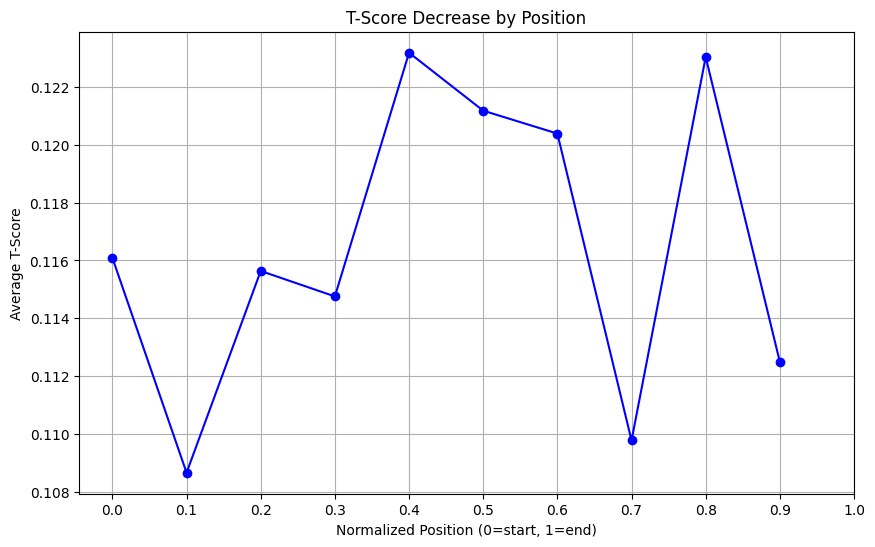


=== Analysis (Include Zero T-Score) ===
Ignore Zero T-Score: False
Interval 0.00-0.10: Avg T-Score = 0.0970
Interval 0.10-0.20: Avg T-Score = 0.0875
Interval 0.20-0.30: Avg T-Score = 0.0919
Interval 0.30-0.40: Avg T-Score = 0.0904
Interval 0.40-0.50: Avg T-Score = 0.0989
Interval 0.50-0.60: Avg T-Score = 0.0944
Interval 0.60-0.70: Avg T-Score = 0.0962
Interval 0.70-0.80: Avg T-Score = 0.0875
Interval 0.80-0.90: Avg T-Score = 0.0997
Interval 0.90-1.00: Avg T-Score = 0.0911


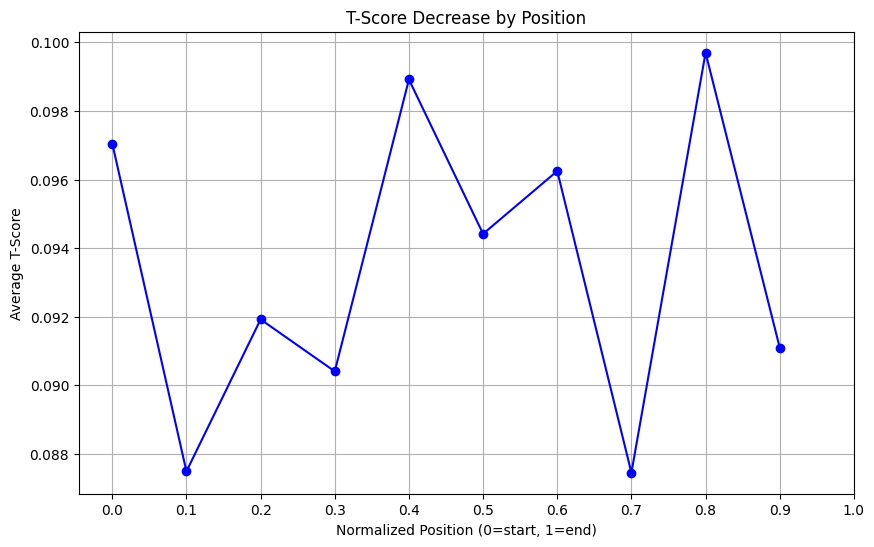

In [7]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
with open('america_texts.json', 'r', encoding='utf-8') as file:
    texts_data = json.load(file)

# Функция для нахождения позиций биграмм в тексте
def get_bigram_positions(text, bigram):
    words = text.split()
    bigram_words = bigram.split()
    positions = []
    for i in range(len(words) - 1):
        if words[i:i + 2] == bigram_words:
            positions.append(i)
    return positions

# Общая функция для анализа
def analyze_t_scores(texts_data, ignore_zero_t_score=True):
    results = {"positions": [], "t_scores": []}

    for text_id, text_info in texts_data.items():
        text = text_info.get("text", "").lower()
        bigrams = text_info.get("bigrams_unique", {})

        for bigram, metrics in bigrams.items():
            t_score = metrics.get("t_score", 0)
            if ignore_zero_t_score and t_score == 0:
                continue
            positions = get_bigram_positions(text, bigram)
            normalized_positions = [pos / len(text.split()) for pos in positions]
            results["positions"].extend(normalized_positions)
            results["t_scores"].extend([t_score] * len(normalized_positions))

    # Группировка позиций по интервалам
    all_positions = results["positions"]
    all_t_scores = results["t_scores"]
    bins = np.linspace(0, 1, 11)
    bin_indices = np.digitize(all_positions, bins)

    # Средний T-Score для каждого интервала
    avg_t_scores = [
        np.mean(
            [all_t_scores[i] for i in range(len(all_t_scores)) if bin_indices[i] == bin_idx]
        )
        for bin_idx in range(1, len(bins))
    ]

    # Текстовый вывод
    print(f"Ignore Zero T-Score: {ignore_zero_t_score}")
    for i in range(len(bins) - 1):
        print(f"Interval {bins[i]:.2f}-{bins[i+1]:.2f}: Avg T-Score = {avg_t_scores[i]:.4f}")

    # Визуализация
    plt.figure(figsize=(10, 6))
    plt.plot(bins[:-1], avg_t_scores, marker='o', color='blue')

    # Оформление графика
    plt.title(f'T-Score Decrease by Position')
    plt.xlabel('Normalized Position (0=start, 1=end)')
    plt.ylabel('Average T-Score')
    plt.xticks(bins)
    plt.grid(True)
    plt.show()

# 1. Игнорируем биграммы с нулевым T-Score
print("=== Analysis (Ignore Zero T-Score) ===")
analyze_t_scores(texts_data, ignore_zero_t_score=True)

# 2. Не игнорируем биграммы с нулевым T-Score
print("\n=== Analysis (Include Zero T-Score) ===")
analyze_t_scores(texts_data, ignore_zero_t_score=False)

=== Analysis by Level (Ignore Zero T-Score) ===
Level: LEVEL 2 | Ignore Zero T-Score: True
Interval 0.00-0.10: Avg T-Score = 0.1187
Interval 0.10-0.20: Avg T-Score = 0.1223
Interval 0.20-0.30: Avg T-Score = 0.1050
Interval 0.30-0.40: Avg T-Score = 0.1157
Interval 0.40-0.50: Avg T-Score = 0.1146
Interval 0.50-0.60: Avg T-Score = 0.1139
Interval 0.60-0.70: Avg T-Score = 0.1136
Interval 0.70-0.80: Avg T-Score = 0.1006
Interval 0.80-0.90: Avg T-Score = 0.1244
Interval 0.90-1.00: Avg T-Score = 0.1127
Level: LEVEL 3 | Ignore Zero T-Score: True
Interval 0.00-0.10: Avg T-Score = 0.1123
Interval 0.10-0.20: Avg T-Score = 0.1111
Interval 0.20-0.30: Avg T-Score = 0.1365
Interval 0.30-0.40: Avg T-Score = 0.1106
Interval 0.40-0.50: Avg T-Score = 0.1501
Interval 0.50-0.60: Avg T-Score = 0.1433
Interval 0.60-0.70: Avg T-Score = 0.1155
Interval 0.70-0.80: Avg T-Score = 0.1071
Interval 0.80-0.90: Avg T-Score = 0.1094
Interval 0.90-1.00: Avg T-Score = 0.1299
Level: LEVEL 4 | Ignore Zero T-Score: True
Int

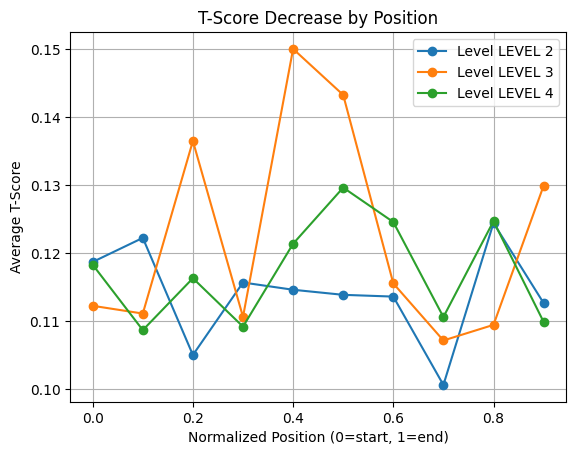


=== Analysis by Level (Include Zero T-Score) ===
Level: LEVEL 2 | Ignore Zero T-Score: False
Interval 0.00-0.10: Avg T-Score = 0.0988
Interval 0.10-0.20: Avg T-Score = 0.0983
Interval 0.20-0.30: Avg T-Score = 0.0811
Interval 0.30-0.40: Avg T-Score = 0.0899
Interval 0.40-0.50: Avg T-Score = 0.0845
Interval 0.50-0.60: Avg T-Score = 0.0859
Interval 0.60-0.70: Avg T-Score = 0.0950
Interval 0.70-0.80: Avg T-Score = 0.0821
Interval 0.80-0.90: Avg T-Score = 0.0927
Interval 0.90-1.00: Avg T-Score = 0.0881
Level: LEVEL 3 | Ignore Zero T-Score: False
Interval 0.00-0.10: Avg T-Score = 0.0935
Interval 0.10-0.20: Avg T-Score = 0.0901
Interval 0.20-0.30: Avg T-Score = 0.1066
Interval 0.30-0.40: Avg T-Score = 0.0916
Interval 0.40-0.50: Avg T-Score = 0.1216
Interval 0.50-0.60: Avg T-Score = 0.1099
Interval 0.60-0.70: Avg T-Score = 0.0908
Interval 0.70-0.80: Avg T-Score = 0.0771
Interval 0.80-0.90: Avg T-Score = 0.0878
Interval 0.90-1.00: Avg T-Score = 0.1150
Level: LEVEL 4 | Ignore Zero T-Score: Fals

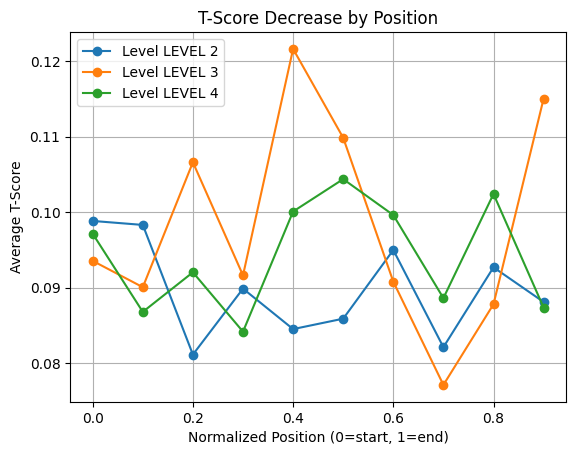

In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
with open('america_texts.json', 'r', encoding='utf-8') as file:
    texts_data = json.load(file)

# Загрузка уровня из файла
with open('files_by_levels.txt', 'r', encoding='utf-8') as f:
    files_by_levels = {'LEVEL 2': [], 'LEVEL 3': [], 'LEVEL 4': []}
    current_level = None
    for line in f:
        line = line.strip()
        if line.startswith('LEVEL'):
            current_level = line
        elif line and current_level:
            files_by_levels[current_level].append(line)

# Функция для нахождения позиций биграмм в тексте
def get_bigram_positions(text, bigram):
    words = text.split()
    bigram_words = bigram.split()
    positions = []
    for i in range(len(words) - 1):
        if words[i:i + 2] == bigram_words:
            positions.append(i)
    return positions

# Общая функция для анализа
def analyze_t_scores_by_level(texts_data, files_by_levels, ignore_zero_t_score=True):
    level_results = {}

    for level, files in files_by_levels.items():
        all_positions = []
        all_t_scores = []

        for file in files:
            if file in texts_data:
                text_info = texts_data[file]
                text = text_info.get("text", "").lower()
                bigrams = text_info.get("bigrams_unique", {})

                for bigram, metrics in bigrams.items():
                    t_score = metrics.get("t_score", 0)
                    if ignore_zero_t_score and t_score == 0:
                        continue
                    positions = get_bigram_positions(text, bigram)
                    normalized_positions = [pos / len(text.split()) for pos in positions]
                    all_positions.extend(normalized_positions)
                    all_t_scores.extend([t_score] * len(normalized_positions))

        # Группировка позиций по интервалам
        bins = np.linspace(0, 1, 11)
        bin_indices = np.digitize(all_positions, bins)

        # Средний T-Score для каждого интервала
        avg_t_scores = [
            np.mean(
                [all_t_scores[i] for i in range(len(all_t_scores)) if bin_indices[i] == bin_idx]
            )
            for bin_idx in range(1, len(bins))
        ]

        level_results[level] = avg_t_scores

    # Построение графиков и текстовый вывод
    for level, avg_t_scores in level_results.items():
        bins = np.linspace(0, 1, 11)

        # Текстовый вывод
        print(f"Level: {level} | Ignore Zero T-Score: {ignore_zero_t_score}")
        for i in range(len(bins) - 1):
            print(f"Interval {bins[i]:.2f}-{bins[i+1]:.2f}: Avg T-Score = {avg_t_scores[i]:.4f}")

        # Визуализация
        plt.plot(bins[:-1], avg_t_scores, marker='o', label=f'Level {level}')

    # Оформление графика
    plt.title(f'T-Score Decrease by Position')
    plt.xlabel('Normalized Position (0=start, 1=end)')
    plt.ylabel('Average T-Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# 1. Игнорируем биграммы с нулевым T-Score, анализ по уровням
print("=== Analysis by Level (Ignore Zero T-Score) ===")
analyze_t_scores_by_level(texts_data, files_by_levels, ignore_zero_t_score=True)

# 2. Не игнорируем биграммы с нулевым T-Score, анализ по уровням
print("\n=== Analysis by Level (Include Zero T-Score) ===")
analyze_t_scores_by_level(texts_data, files_by_levels, ignore_zero_t_score=False)